In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import riskfolio as rp

import matplotlib.pyplot as plt

In [3]:
cryptos = ['BTC-USD', 'ETH-USD', 'BNB-USD']

start, end = '2020-01-01', '2023-01-01'
crypto_data = yf.download(cryptos,
                          start=start,
                          end=end)['Close']

returns = crypto_data.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


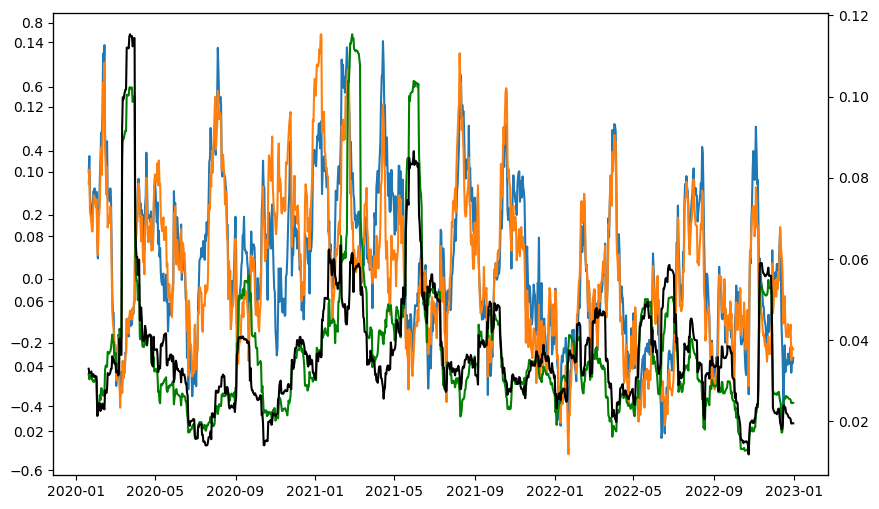

In [4]:
optimal_weight1 = [0.64, 0.0, 0.36]
optimal_weight2 = [0.1, 0.6, 0.3]

port_d_r1 = returns.dot(optimal_weight1)
cum_r1 = (1+port_d_r1).cumprod()

w = 20
roll_vol1 = port_d_r1.rolling(window=w).std()

rf = 0.002

sharpe_ratio1 = (port_d_r1.rolling(window=w).mean() - rf)/roll_vol1

# number 2
port_d_r2 = returns.dot(optimal_weight2)
cum_r2 = (1+port_d_r2).cumprod()

w = 20
roll_vol2 = port_d_r2.rolling(window=w).std()

rf = 0.002

sharpe_ratio2 = (port_d_r2.rolling(window=w).mean() - rf)/roll_vol2

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sharpe_ratio1.index, sharpe_ratio1)
ax.plot(sharpe_ratio2.index, sharpe_ratio2)

ax2 = ax.twinx()
ax2.plot(sharpe_ratio1.index, roll_vol1, c='g')

ax3 = ax2.twinx()
ax3.plot(sharpe_ratio2.index, roll_vol2, c='k')

plt.show()